# Data description

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

# Importing Libraries

In [182]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [183]:
df = pd.read_csv('data_cancer.csv')

In [184]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [186]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
fig = px.pie(df, values=df['diagnosis'].value_counts().values, names=df['diagnosis'].value_counts().index)
fig.show()

# Feature selection with correlation matrix

Text(0.5, 1.05, 'Correlation of df Features')

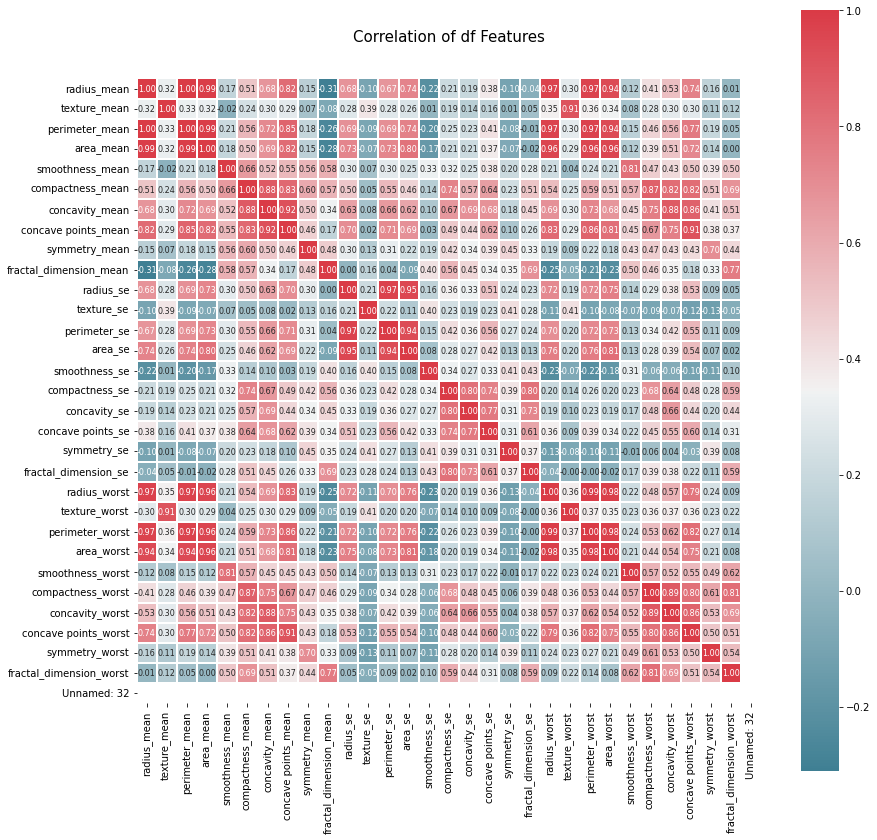

In [187]:
corr = df.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of df Features', y=1.05, size=15)

As we can see many features are correlated to each other so we will remove highly correlated features bigger than 0.95

In [188]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_10728/616785541.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



We have now **26** features

In [189]:
len(df.columns)

26

# Checking formissing values

In [190]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
texture_worst                0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

We don`t need "Unnamed: 32" and id columns so we can drop them

In [191]:
#droping feature
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [192]:
# independent variables
x = df.drop('diagnosis',axis=1)
#dependent variables
y = df.diagnosis

# Encoding

We will handle categorical values using LabelEncoder so we can use them in ANN

In [193]:
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
y = lb.fit_transform(y)

# Splitting Data

In [194]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

# Scaling the Data

When we create the artificial neural network, then we have to scale the data into smaller numbers because the deep learning algorithm multiplies the weights and input data of the nodes and it takes lots of time, So for reducing that time we scale the data.

We will scalling the data with StandardScaler

In [195]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler
#creating object
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# What are artificial neural networks?
An artificial neuron network (ANN) is a computational model based on the structure and functions of biological neural networks. Information that flows through the network affects the structure of the ANN because a neural network changes - or learns, in a sense - based on that input and output. ANNs are considered nonlinear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found. ANN is also known as a neural network.

A single neuron is known as a perceptron. It consists of a layer of inputs(corresponds to columns of a dataframe). Each input has a weight which controls the magnitude of an input. The summation of the products of these input values and weights is fed to the activation function. Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.



In [196]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Epoch 1/100
15/15 [==============================] - 1s 11ms/step - loss: 1.2105 - accuracy: 0.3231 - val_loss: 0.8707 - val_accuracy: 0.3333
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9397 - accuracy: 0.5077 - val_loss: 0.7153 - val_accuracy: 0.5965
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7444 - accuracy: 0.6044 - val_loss: 0.5949 - val_accuracy: 0.6754
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6125 - accuracy: 0.7055 - val_loss: 0.5016 - val_accuracy: 0.7719
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5331 - accuracy: 0.7275 - val_loss: 0.4315 - val_accuracy: 0.8947
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.8044 - val_loss: 0.3800 - val_accuracy: 0.9123
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4102 - accuracy: 0.8308 - val_loss: 0.3438 - val_accuracy: 0.9474
Epoch 8/100


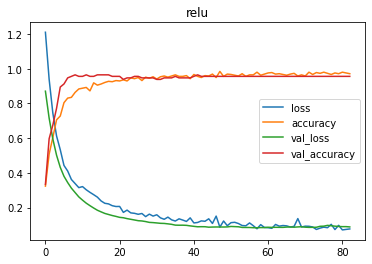

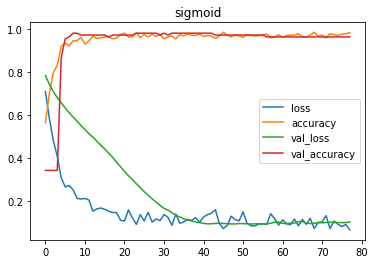

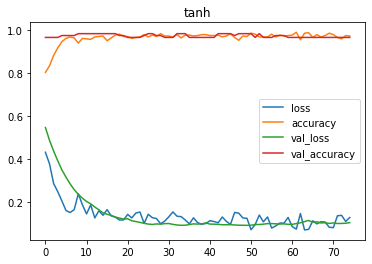

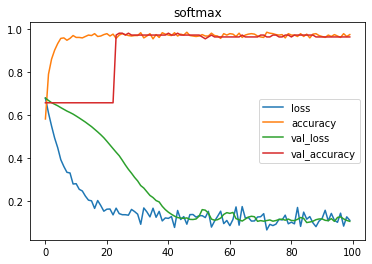

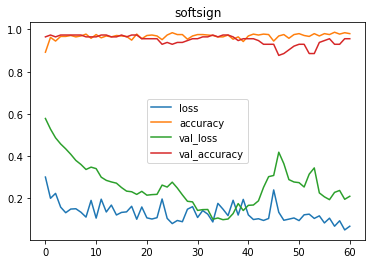

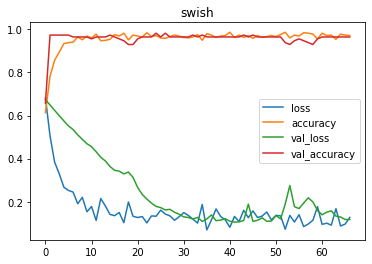

In [203]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()
result = []
accuracy_report = []
act_fun = {'relu':'relu','sigmoid':'sigmoid','tanh':'tanh','softmax':'softmax','softsign':'softsign','swish':'swish'}
for i,j in act_fun.items():
    ann.add(Dense(units = 20,activation = j))
    ann.add(BatchNormalization())
    ann.add(Dropout(0.5))
    ann.add(Dense(units = 1,activation = 'sigmoid'))
    #COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    #setting callbacks for monitoring maximum accuracy
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
    #TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
    model=ann.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])
    
    
    #acuracy plot
    losses = pd.DataFrame(ann.history.history)
    losses.plot()
    plt.title(i)
    
    
    #now testing for Test data
    y_pred = ann.predict(xtest)
    
    #converting values
    y_pred = (y_pred>0.5)
    cm = confusion_matrix(ytest,y_pred)
    score = accuracy_score(ytest,y_pred)
    print(cm)
    #classification_report
    print('---'*20)
    print("Classification Report Of", i )
    print('---'*20)
    print(classification_report(ytest,y_pred))

    print('---'*20)
    print('---'*20)
    result.append((i,[score]))
    print('---'*20)
    print('---'*20)

    

The classification report containing precission, recall, F1-Score is mentioned under the epochs sepratetly for all activation fuction.

And here we can also see the plots for loss and accuracy with Epochs in each activation function

In [199]:
result

[('relu', [0.9649122807017544]),
 ('sigmoid', [0.9736842105263158]),
 ('tanh', [0.9736842105263158]),
 ('softmax', [0.9649122807017544]),
 ('softsign', [0.6403508771929824]),
 ('swish', [0.34210526315789475])]